# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Guilherme Fernandes Rezende Santos

**RA**: 813467


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

##### Importando as bibliotecas que serão usadas nessa etapa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

##### Prepara o DF dos dados do treinamento

In [2]:
dados_treino = pd.read_csv('./data/train.csv')
dados = pd.read_csv('./data/RHP_data.csv')

dados_treino = dados.merge(dados_treino, on='Id', how='right')

display(dados_treino.head(10))


,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,19.0,11/07/05,13/12/99,5.79,SB,Normais,110.0,...,HAS-1 PAD,Normal,ausente,100,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
1,17249,32.0,0,NaN,12/02/04,10/06/92,12.11,GS,Normais,100.0,...,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,NaN,Anormal
2,4483,13.0,87,17.0,22/12/03,05/11/01,2.21,SulAmerica,Normais,NaN,...,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
3,6830,11.0,0,NaN,11/12/06,26/05/05,1.6,SA,Normais,NaN,...,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
4,11652,42.4,136,23.0,23/03/01,03/03/01,0.06,NaN,Normais,100.0,...,Não Calculado,Normal,ausente,78,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
5,15430,45.0,161,17.0,12/06/03,15/02/96,7.6,UR,Normais,120.0,...,HAS-1 PAS,Normal,ausente,80,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
6,1023,18.5,105,17.0,29/03/05,14/06/01,3.93,SA,Normais,90.0,...,Normal,Normal,ausente,92,NaN,NaN,F,7 - Outro,Outro,Normal
7,5733,12.0,0,NaN,04/07/06,06/03/05,1.38,UR,Normais,NaN,...,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
8,14309,24.0,112,19.0,15/04/04,18/03/99,5.27,Camed,Normais,100.0,...,Normal,Normal,ausente,100,Outro,NaN,M,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,Normal
9,3437,17.0,100,17.0,40136,38926,3.44,CAMED,Normais,NaN,...,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia,Normal


##### Após o carregamento dos dados, será estudado a análise de cada atributo

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. Alterações no B2 podem sugerir problemas como hipertensão pulmonar ou doenças valvares.

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. Pode indicar problemas como regurgitação ou estenose valvar.

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos ou metabólicos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

##### Medidas descritivas dos dados

In [3]:
display(dados_treino.describe(include='all'))

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
count,14727.000000,14467.000000,14727.000000,10710.000000,13744,13351,13351,10234,13535,8232.000000,...,14530,13550,13562,12832,10113,539,14724,13654,10668,13559
unique,NaN,NaN,NaN,NaN,2063,6007,1927,407,7,NaN,...,9,5,7,119,8,8,6,5,16,3
top,NaN,NaN,NaN,NaN,26/05/09,09/05/04,0.01,GS,Normais,NaN,...,Não Calculado,Normal,ausente,80,Assintomático,Palpitacao,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
freq,NaN,NaN,NaN,NaN,27,20,165,2221,13395,NaN,...,7370,12951,8723,2004,7514,126,7253,6492,3429,8137
mean,8946.345013,20.979374,82.971209,17.792437,NaN,NaN,NaN,NaN,NaN,101.395773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5167.713313,18.189793,57.028885,11.214492,NaN,NaN,NaN,NaN,NaN,14.995826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,-40.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4458.500000,6.000000,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,90.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8926.000000,17.500000,98.000000,17.000000,NaN,NaN,NaN,NaN,NaN,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13442.500000,31.000000,130.000000,19.000000,NaN,NaN,NaN,NaN,NaN,110.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Correção de 'Normais' por 'Normal'
Antes de plotar os gŕaficos, farei uma pequena substituição em uma amostra específica, apenas para corrigir a classe de normais para normal, afim de tornar o gráfico menos variado

In [4]:
x  = dados_treino['CLASSE'] == 'Normais'

dados_treino.loc[x, 'CLASSE'] = 'Normal'

##### Plotando os Gráficos

Gráfico de distribuição em relação ao motivo1 da visita e a condição do paciente

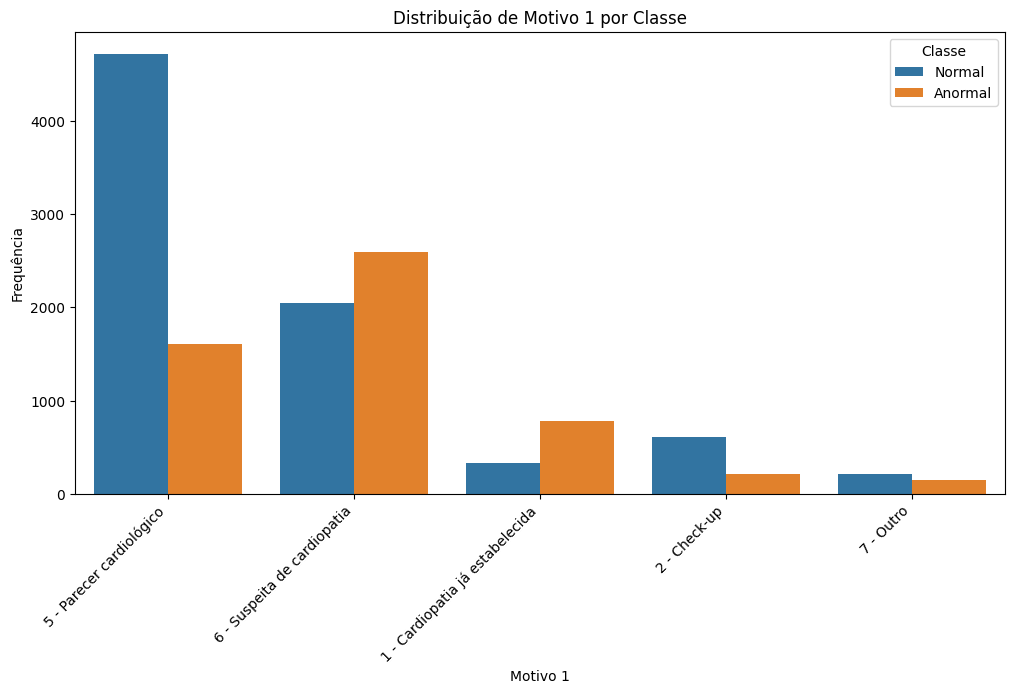

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='MOTIVO1', hue='CLASSE',
              order=dados_treino['MOTIVO1'].value_counts().index)
plt.xlabel('Motivo 1')
plt.ylabel('Frequência')
plt.title('Distribuição de Motivo 1 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()



Gráfico de distribuição em relação ao motivo 2 da visita e a condição do paciente

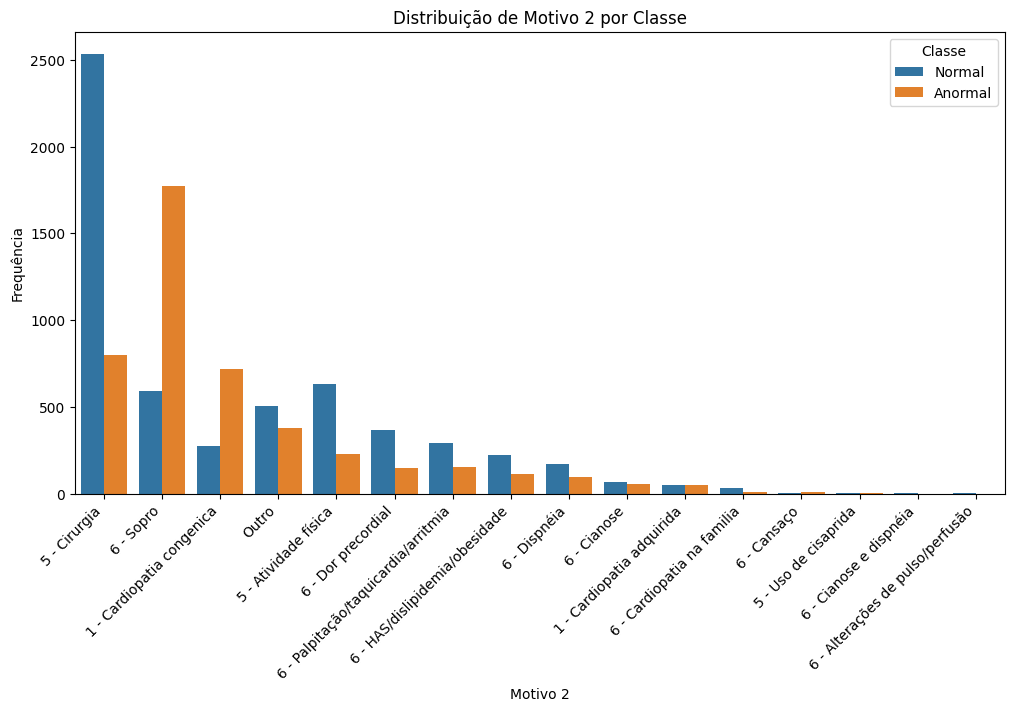

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='MOTIVO2', hue='CLASSE',
              order=dados_treino['MOTIVO2'].value_counts().index)
plt.xlabel('Motivo 2')
plt.ylabel('Frequência')
plt.title('Distribuição de Motivo 2 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao HD1 do paciente e a classe

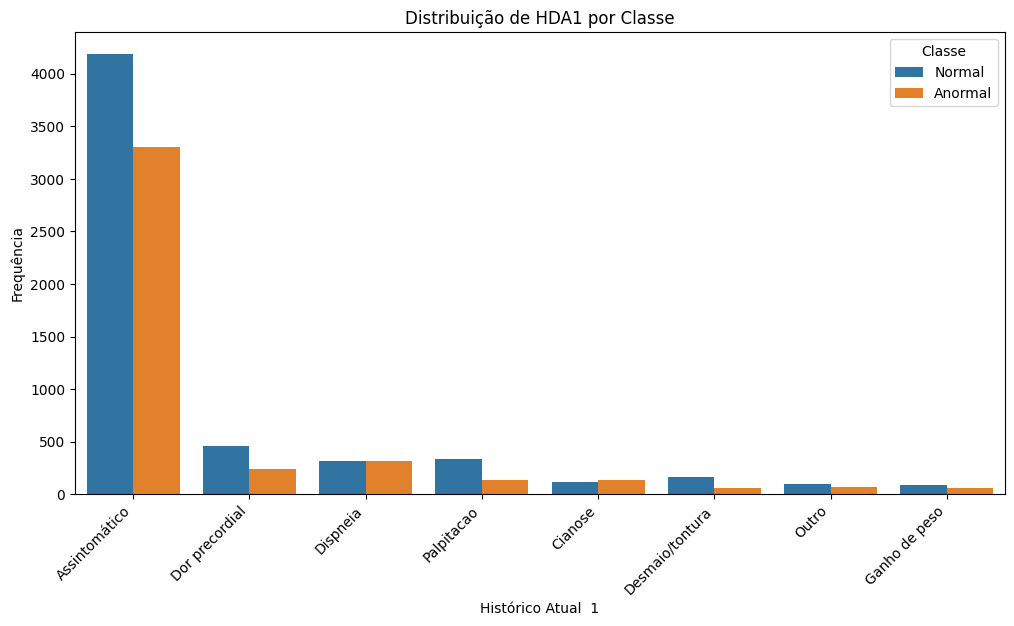

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='HDA 1', hue='CLASSE',
              order=dados_treino['HDA 1'].value_counts().index)
plt.xlabel('Histórico Atual  1')
plt.ylabel('Frequência')
plt.title('Distribuição de HDA1 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()


Gráfico de distribuição em relação ao HD2 do paciente e a classe

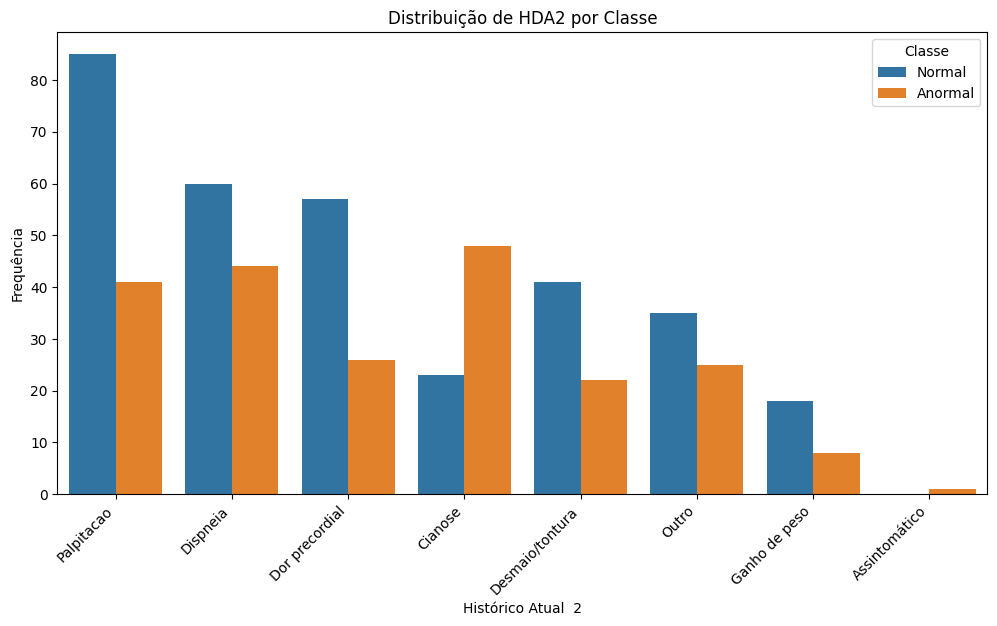

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='HDA2', hue='CLASSE',
              order=dados_treino['HDA2'].value_counts().index)
plt.xlabel('Histórico Atual  2')
plt.ylabel('Frequência')
plt.title('Distribuição de HDA2 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()


Gráfico de distribuição em relação à condição de sopro do paciente e a classe

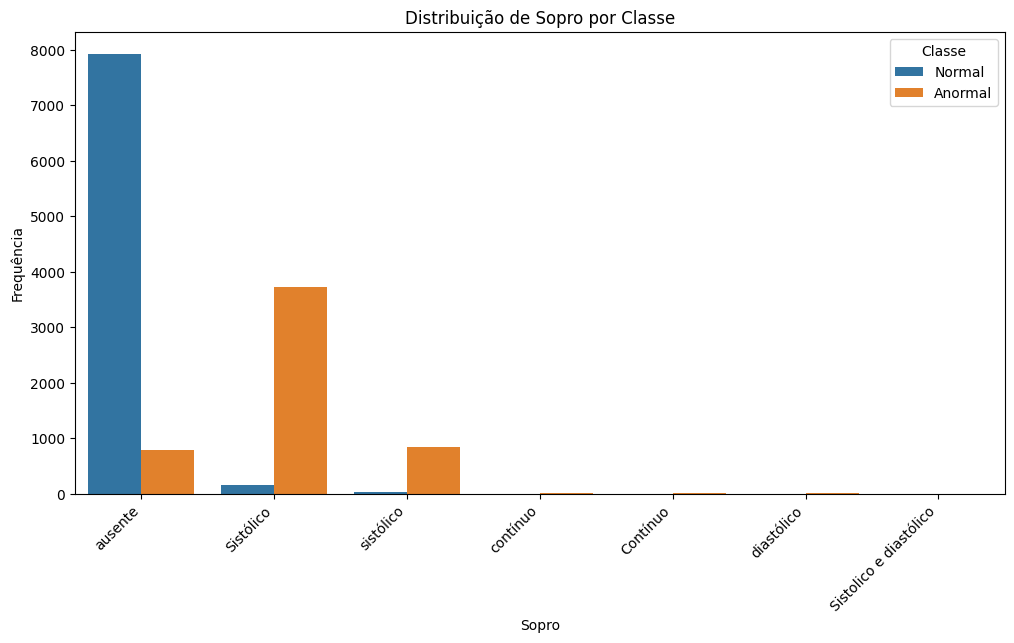

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='SOPRO', hue='CLASSE',
              order=dados_treino['SOPRO'].value_counts().index)
plt.xlabel('Sopro')
plt.ylabel('Frequência')
plt.title('Distribuição de Sopro por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao B2 do paciente e a classe

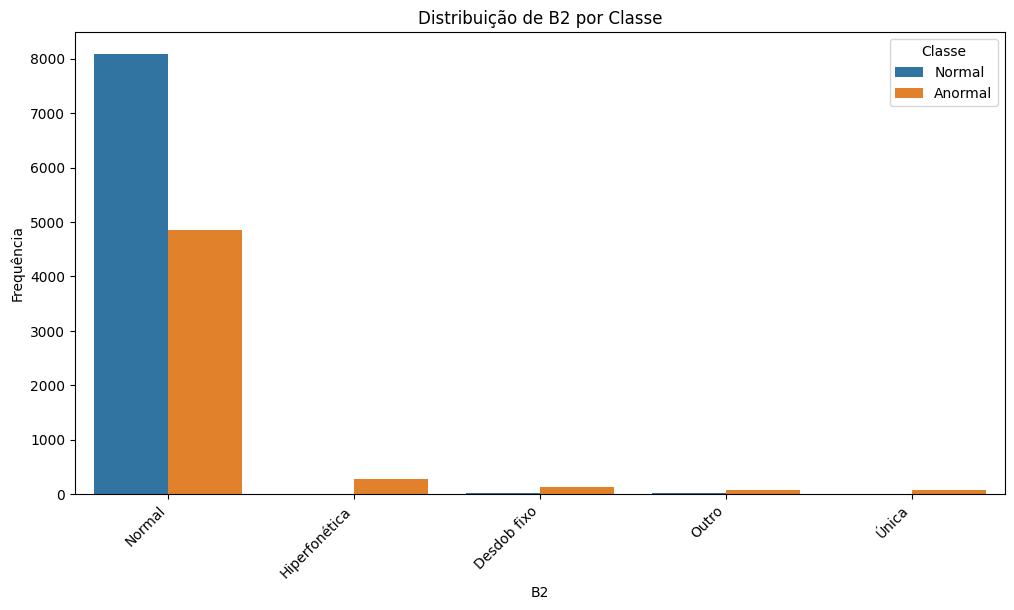

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='B2', hue='CLASSE',
              order=dados_treino['B2'].value_counts().index)
plt.xlabel('B2')
plt.ylabel('Frequência')
plt.title('Distribuição de B2 por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao PPA do paciente e a classe

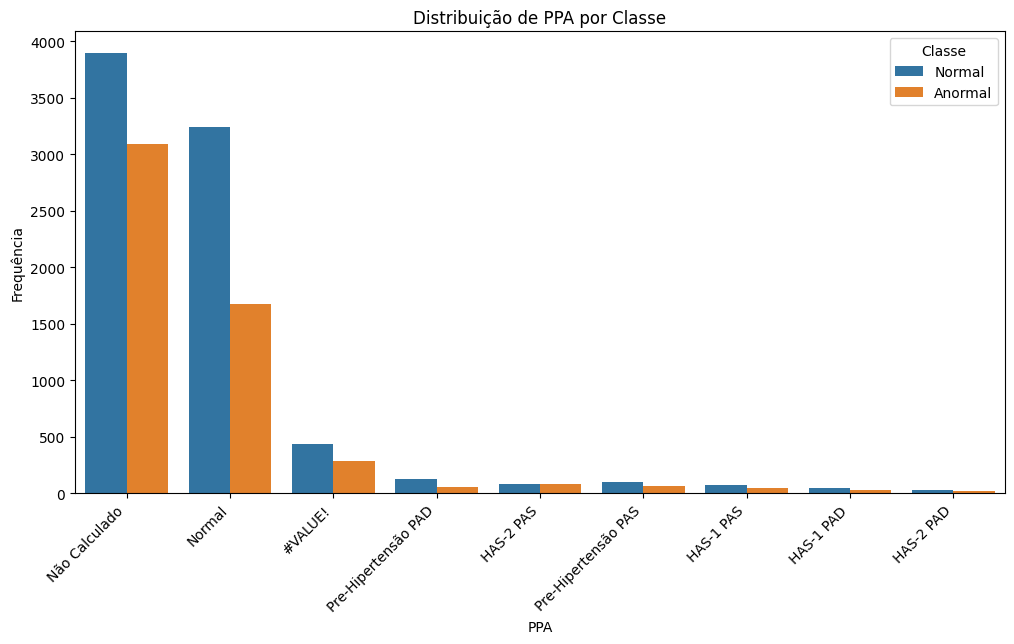

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='PPA', hue='CLASSE',
              order=dados_treino['PPA'].value_counts().index)
plt.xlabel('PPA')
plt.ylabel('Frequência')
plt.title('Distribuição de PPA por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao Pulso do paciente e a classe

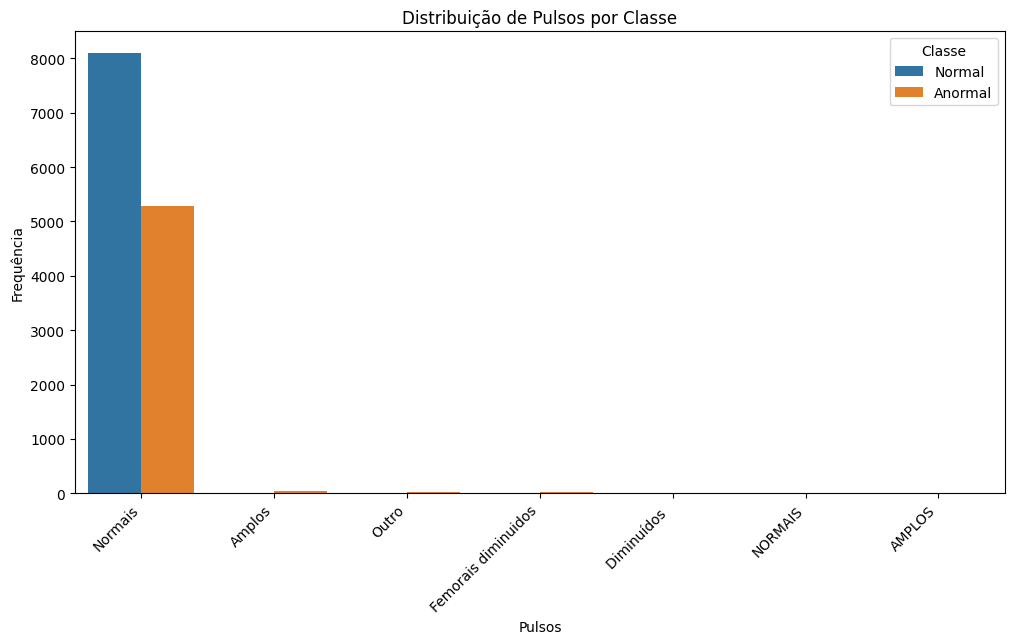

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dados_treino, x='PULSOS', hue='CLASSE',
              order=dados_treino['PULSOS'].value_counts().index)
plt.xlabel('Pulsos')
plt.ylabel('Frequência')
plt.title('Distribuição de Pulsos por Classe')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Classe')
plt.show()

Gráfico de distribuição em relação ao sexo do paciente e a classe

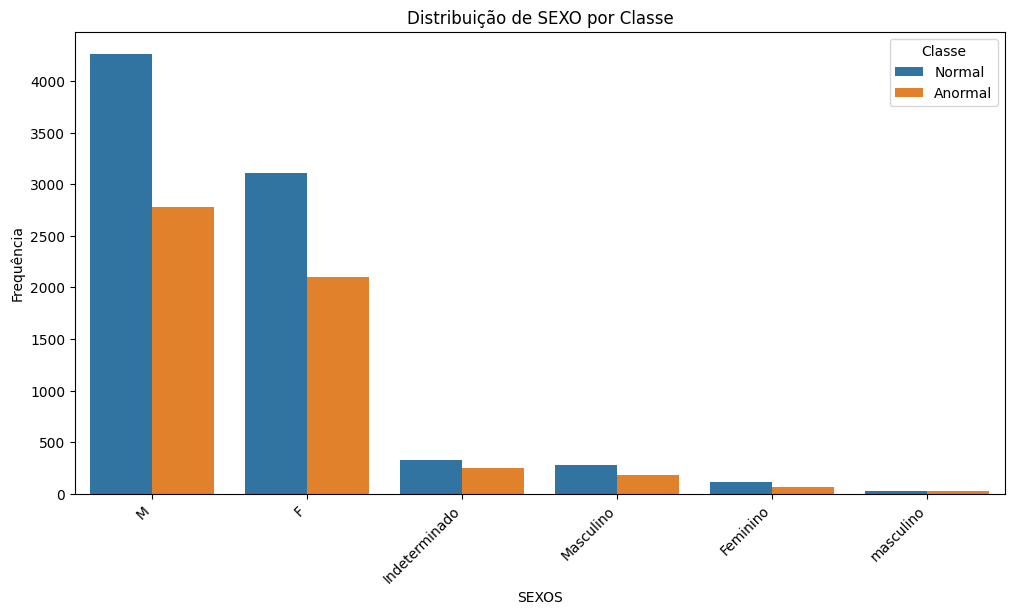

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="SEXO",
    hue="CLASSE",
    order=dados_treino["SEXO"].value_counts().index,
)
plt.xlabel("SEXOS")
plt.ylabel("Frequência")
plt.title("Distribuição de SEXO por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

##### Plotagem de gráficos boxplots para colunas numéricas. Tendo como objetivo a identificação de outliers

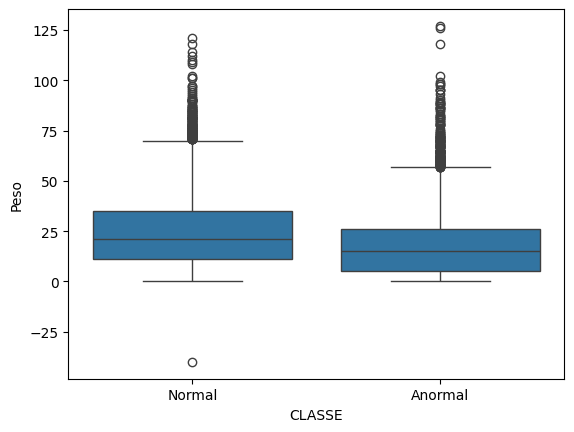

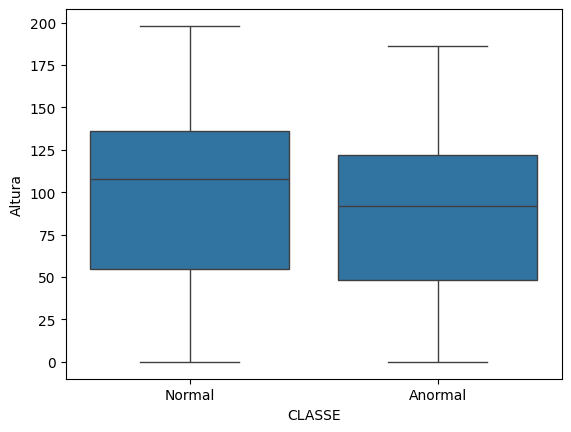

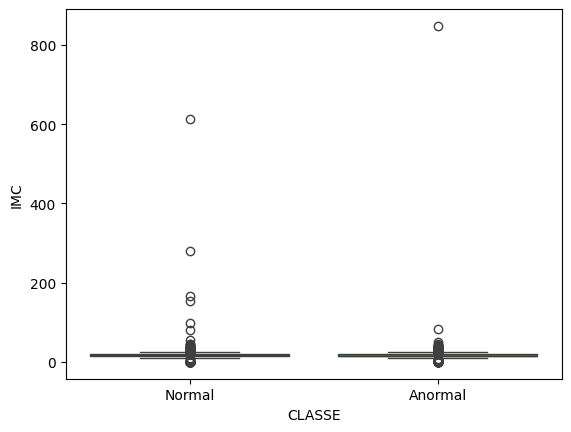

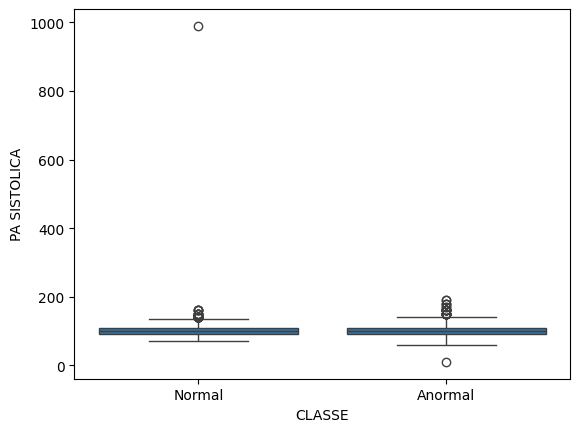

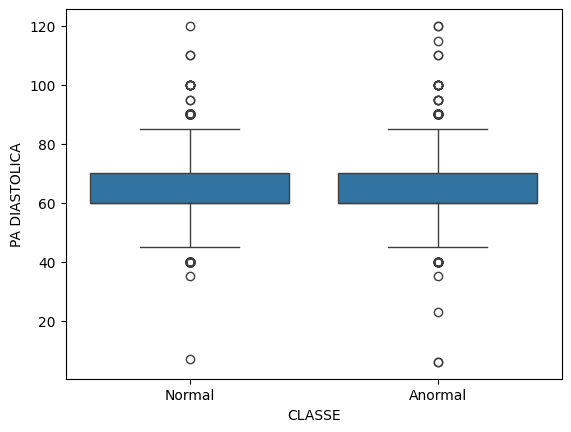

In [14]:
colunas_numericas = dados_treino.select_dtypes(include='number').columns[1:]

for atributo in colunas_numericas:
  plt.Figure(figsize=(8,8))

  sns.boxplot(x = 'CLASSE', y = atributo, data = dados_treino, whis=1.5)

  plt.show()

##### Insights obtidos após obeservação e análise dos gráficos

* No motivo 1 para a visita, uma parte considerável dos pacientes que possuem parecer cardiológico e suspeita de cardiopatia possuem alguma anormalidade.

* No motivo 2 para a visita, uma parte considerável dos pacientes que tem como motivo cirurgia, sopro e cardiopatia congenica possuem alguma anormalidade. Com atenção especial voltada para o sopro, pois cerca de <strong>72%</strong>  daqueles que possuem sopro como condição possuem alguma anormalidade.

* No histórico de doença atual 2, todos os diferentes valores possuem uma parcela considerável de pacientes com anormalidade, assim não pode-se desconsiderar nenhum deles.

* Em SOPRO,é necessário padronizar os valores, visto que há diferentes valores que representam a mesma coisa, como Sistólico e sistólico, o mesmo ocorre com o atributo pulso.

* Há a existência de outliners a serem tratados, como mostrado pelo gráfico boxplot.

* Além dos outliers, é necessário tratar diversos casos de ruído, como #VALUE em PPA

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

#### Começaremos o pré-processamento dos dados com a remoção de outliers nas colunas numéricas

##### Agora iremos remover as inconsistências entra os valores de cada coluna.



Começaremos pelo peso, pelo gráfico boxplot há apenas um outlier a ser removido, um peso negativo e diversos pesos com valor igual a 0. Os demais pesos acima do Q3 não serão removidos pois não apresentam inconsistências e também apresentam um grande volume de dados.

In [15]:
peso_outliner = dados_treino[dados_treino['Peso'] < 0]
peso_invalido = dados_treino[dados_treino["Peso"] == 0]

dados_treino.drop(peso_outliner.index, inplace=True)
dados_treino.drop(peso_invalido.index, inplace=True)

Plotagem do boxplot da coluna 'Peso' para mostrar a remoção do outliner

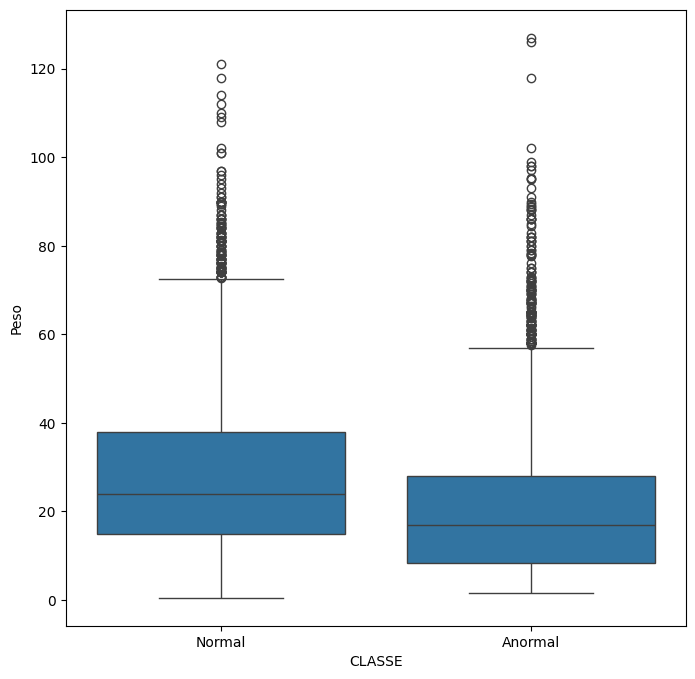

In [16]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="CLASSE", y="Peso", data=dados_treino, whis=1.5)
plt.show()

Agora trataremos amostras de com alturas inválidas, que possuem valor igual a 0. Outros valores também são considerados inválidos, pois são pequenos demais para serem verdade, seguindo a tabela da fonte: https://www.unimed.coop.br/viver-bem/pais-e-filhos/estatura-por-idade

In [17]:
pd.set_option("display.max_columns", None)

É convertido a coluna idade em float para poder realizar as comparações.

In [18]:
# Converte a coluna 'IDADE' para numérica
dados_treino["IDADE"] = pd.to_numeric(dados_treino["IDADE"], errors="coerce")


altura_invalida = dados_treino[dados_treino["Altura"] == 0]
dados_treino.drop(altura_invalida.index, inplace=True)

altura_irreal = dados_treino[dados_treino["Altura"] < 45]
dados_treino.drop(altura_irreal.index, inplace=True)

altura_fora_padrao = dados_treino[
    (dados_treino["Altura"] < 80) & (dados_treino["IDADE"] >= 2)
]
dados_treino.drop(altura_fora_padrao.index, inplace=True)

Após remover os valores inválidos de altura, iremos substituir os valores NaN de altura  por sua mediana, devido ao alto desvio padrão da amostra. 

In [19]:
display(dados_treino['Altura'].describe(include='all'))

count    10755.000000
mean       112.297071
std         33.703446
min         45.000000
25%         90.000000
50%        115.000000
75%        138.000000
max        198.000000
Name: Altura, dtype: float64

In [20]:
dados_treino['Altura'] = dados_treino['Altura'].fillna(value=dados_treino['Altura'].median())

Agora iremos repetir o processo para o peso

In [21]:
dados_treino["Peso"] = dados_treino["Peso"].fillna(
    value=dados_treino["Peso"].median()
)

Tratados todos os valores faltantes para altura e peso, agora iremos recalcular o imc

In [22]:
altura = dados_treino['Altura']
peso = dados_treino['Peso']

altura /= 100

imc = peso / (altura ** 2)

dados_treino['IMC'] = imc

Plotando o boxplot do IMC para mostrar a remoção de valores inválidos.

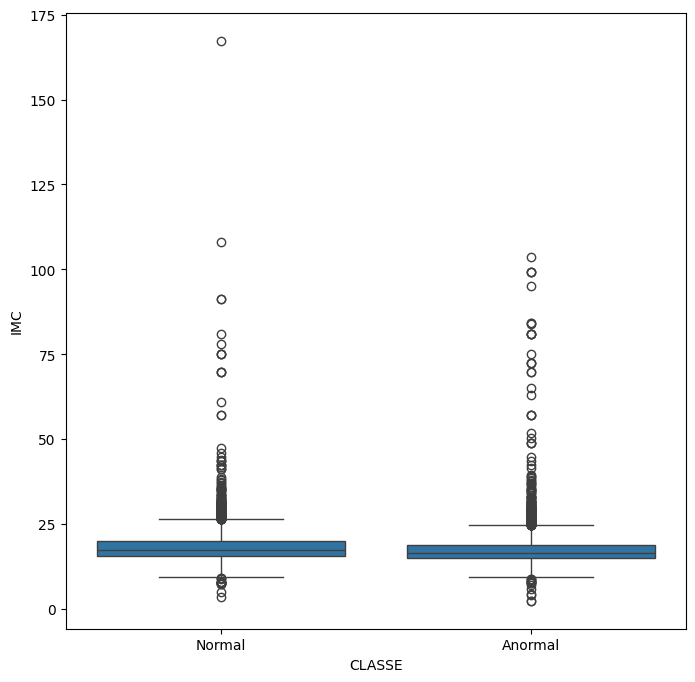

In [23]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="CLASSE", y="IMC", data=dados_treino, whis=1.5)
plt.show()

Após padronizar o peso de a altura, iremos usá-los para resolver as inconsistências nos valores da coluna idade. Para iniciar, iremos converte-lá para o tipo float.

Agora iremos plotar o boxplot para analisar os dados.

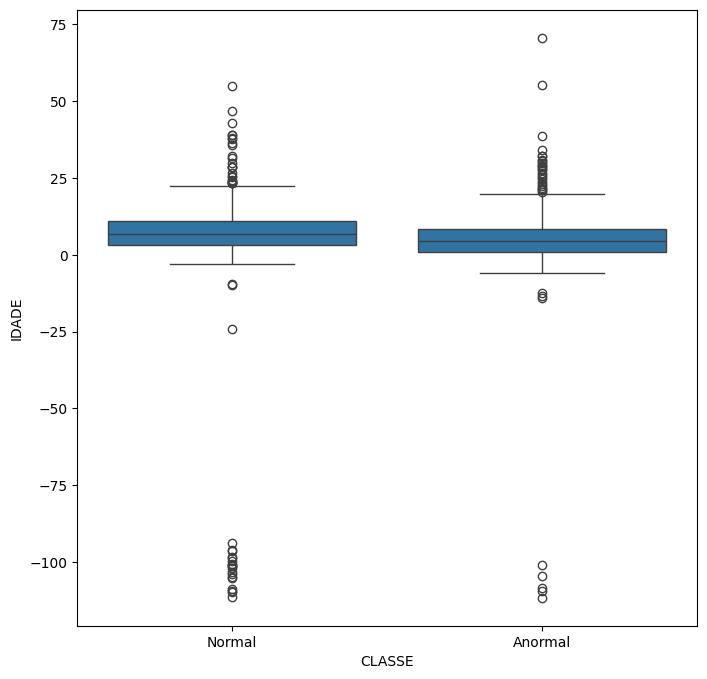

In [24]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="CLASSE", y="IDADE", data=dados_treino, whis=1.5)
plt.show()

Como se pode observar, há um número gigantesco de inconsistências, por isso não seria possível apenas removê-los, ainda mais considerando o tamanho do conjunto de dados. Para isso, iremos usar o peso e a altura de cada um para substituir esses valores incorretos, que deveriam estar num intervalo de 0 até 19 anos.

Em seguida, iremos padronizar os valores de 'SEXO' em valores únicos, como também  resolver os NaN e indeterminados.

Primeiro, iremos padronizar os diferentes valores.

In [25]:
x = dados_treino['SEXO'] == 'masculino'
dados_treino.loc[x, 'SEXO'] = 'M'

x = dados_treino["SEXO"] == "Masculino"
dados_treino.loc[x, "SEXO"] = "M"

x = dados_treino["SEXO"] == "Feminino"
dados_treino.loc[x, "SEXO"] = "F"

Após padronizar os valores, iremos analisar os dados para verificar como iremos tratar os valores faltantes.

In [26]:
print(len(dados_treino[dados_treino['SEXO'] == 'M']))
print(len(dados_treino[dados_treino['SEXO'] == 'F']))

6111
4324


A quantidade de Homens para mulheres segue a distribuição de 3/5 para 2/5 nas amostras com valores, então essa distribuição será usada para as amostras faltantes

In [27]:
valores_faltantes  = dados_treino['SEXO'].isna().sum()
valores_faltantes += len(dados_treino[dados_treino['SEXO'] == 'Indeterminado'])

qtd_homens = int(valores_faltantes * 3/5)
qtd_mulheres = valores_faltantes - qtd_homens

Calculados os valores, iremos começar o processo de substituição

In [28]:
# Substituimdo 'Indeterminado' por NaN para facilitar
dados_treino["SEXO"] = dados_treino["SEXO"].replace("Indeterminado", np.nan)

dados_treino.loc[dados_treino["SEXO"].isna(), "SEXO"] = ["M"] * qtd_homens + ["F"] * qtd_mulheres

Plotando o gráfico de sexo por classes para mostrara  mudança.

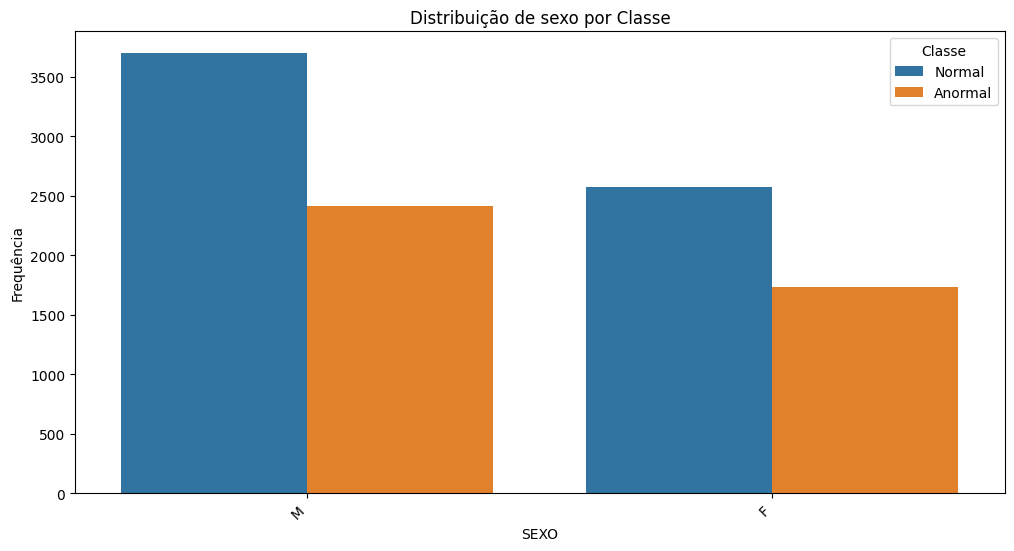

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="SEXO",
    hue="CLASSE",
    order=dados_treino["SEXO"].value_counts().index,
)
plt.xlabel("SEXO")
plt.ylabel("Frequência")
plt.title("Distribuição de sexo por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

A próxima coluna que terá os outliners tratados será a 'PA SISTOLICA'. Após uma breve pesquisa, foi encintrado que valores abaixo de 20 mmHg e acima de 250 mmHg são considerados valores absurdo, tratados como erro de medição, assim eles serão usados como intervalos para detectar outliners

In [30]:
outliners_pasistolica_acima = (dados_treino[dados_treino["PA SISTOLICA"] > 250]) 
outliners_pasistolica_abaixo = dados_treino[dados_treino["PA SISTOLICA"] < 20]

dados_treino.drop(outliners_pasistolica_abaixo.index, inplace=True)
dados_treino.drop(outliners_pasistolica_acima.index, inplace=True)

Agora iremos lidar com os valores faltantes em PA SISTOLICA e PA DIASTOLICA. Mas primeiro iremos analisar o desvio padrão de cada uma.

In [31]:
print(dados_treino['PA SISTOLICA'].describe())

count    6577.00000
mean      101.33085
std        11.36451
min        60.00000
25%        90.00000
50%       100.00000
75%       110.00000
max       190.00000
Name: PA SISTOLICA, dtype: float64


In [32]:
print(dados_treino["PA DIASTOLICA"].describe())

count    6572.000000
mean       62.404595
std         8.900071
min         6.000000
25%        60.000000
50%        60.000000
75%        70.000000
max       120.000000
Name: PA DIASTOLICA, dtype: float64


Levando em conta que o std é relativamente baixo, podemos substituir os valores NaN pelas médias.

In [33]:
dados_treino['PA DIASTOLICA'] = dados_treino['PA DIASTOLICA'].fillna(value=dados_treino['PA DIASTOLICA'].mean())

dados_treino['PA SISTOLICA'] = dados_treino["PA SISTOLICA"].fillna(
    value=dados_treino["PA SISTOLICA"].mean()
)

In [34]:
print(dados_treino['PA DIASTOLICA'].isna().sum())

0


In [35]:
print(dados_treino["PA SISTOLICA"].isna().sum())

0


Plotagem do boxplot da coluna 'PA SISTOLICA' para mostrar a remoção dos outliners

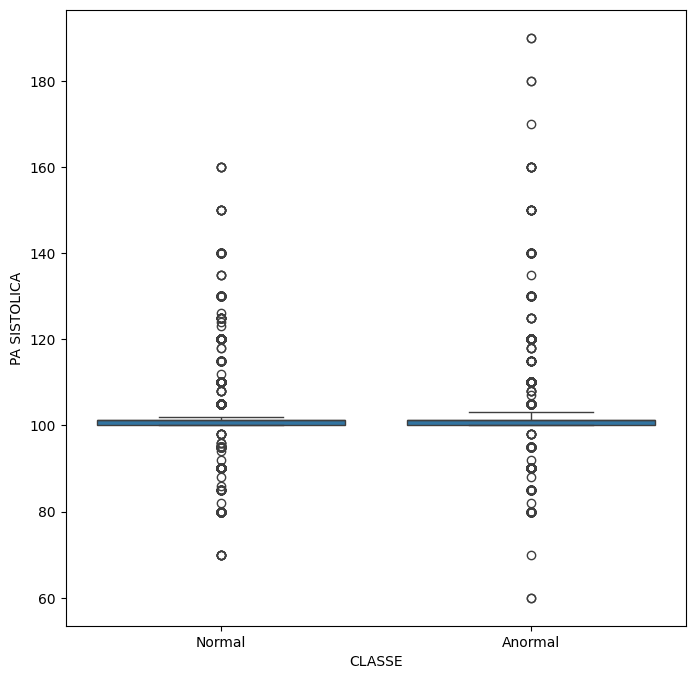

In [36]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="CLASSE", y="PA SISTOLICA", data=dados_treino, whis=1.5)
plt.show()

A próxima coluna que terá seus outliners tratados será a 'PA DIASTOLICA'. Após procurar, são ditos como valores irreais: valores inferiores a 30mmHg e valores acima de 150mHg.

In [37]:
outliners_diastolica_abaixo = dados_treino[dados_treino['PA DIASTOLICA'] < 30]
outliners_diastolica_acima = dados_treino[dados_treino['PA DIASTOLICA'] > 150]

dados_treino.drop(outliners_diastolica_abaixo.index, inplace=True)
dados_treino.drop(outliners_diastolica_acima.index, inplace=True)

Plotagem dos boxplot para comprovar a remoção de outliners

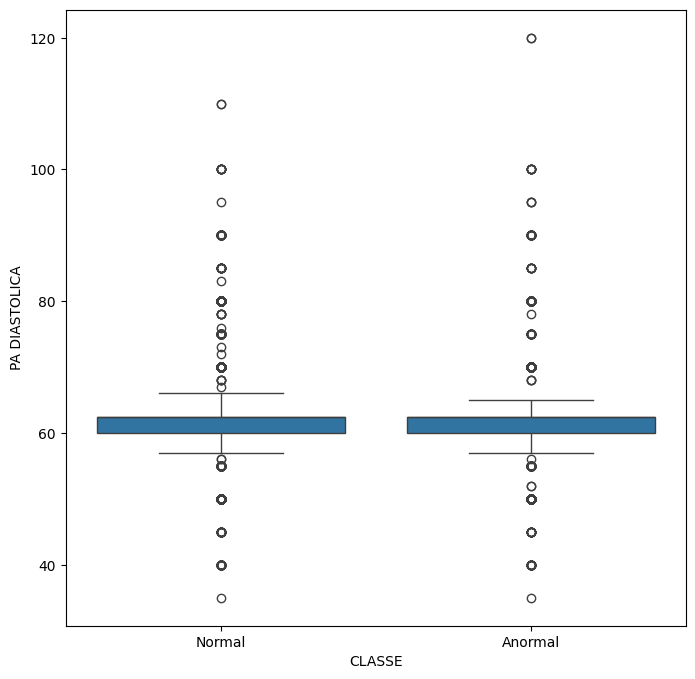

In [38]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="CLASSE", y="PA DIASTOLICA", data=dados_treino, whis=1.5)
plt.show()

A respeito da coluna IMC, ao invés de removermos os outliners, que estão em grande quantidade, iremos usar os valores de peso e altura para recalcular o IMC.

Começando pelas incosistências na coluna 'SOPRO', padronizando diferentes valores que representam a mesma coisa.

In [39]:
x = dados_treino['SOPRO'] == 'contínuo'
dados_treino.loc[x, 'SOPRO'] = 'Contínuo'

x = dados_treino["SOPRO"] == "sistólico"
dados_treino.loc[x, 'SOPRO'] = 'Sistólico'

Plotagem da coluna 'SOPRO' para verificar as alterações

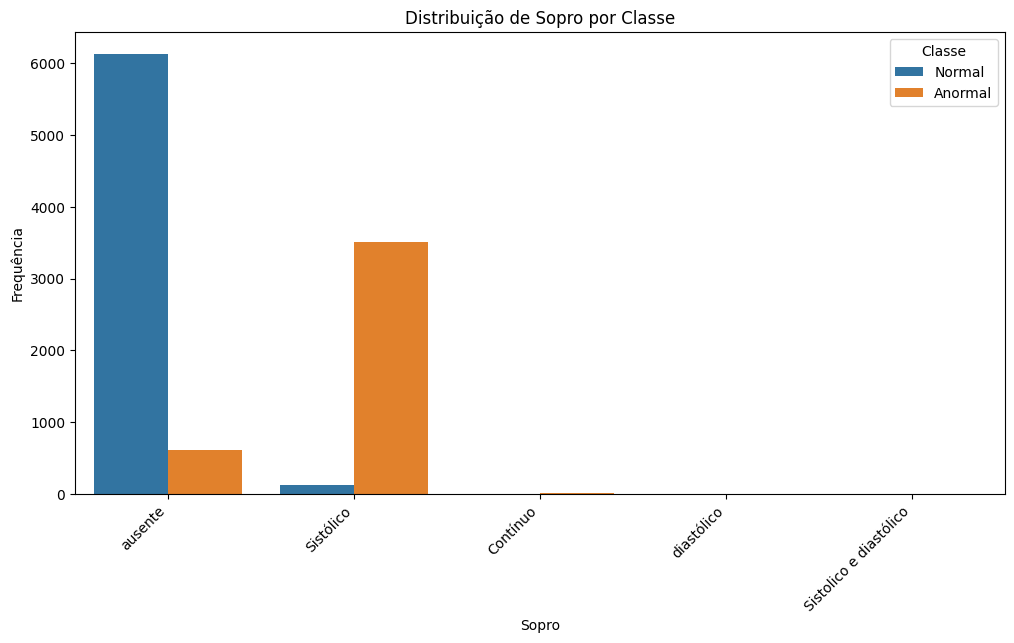

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="SOPRO",
    hue="CLASSE",
    order=dados_treino["SOPRO"].value_counts().index,
)
plt.xlabel("Sopro")
plt.ylabel("Frequência")
plt.title("Distribuição de Sopro por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

A próxima incosistência está localizada na coluna PPA (pressão de pulso arterial). Muitos amostras possuem #VALUE! e 'Não calculado' como valor, serão recalculados utilizando a pressão arterial sistólica e pressão arterial diastólica.

In [41]:
error_values = (
    (dados_treino["PPA"] == "#VALUE!")
    | (dados_treino["PPA"] == "Não Calculado")
    | (dados_treino["PPA"].isna())
)

pas_value = dados_treino.loc[error_values, 'PA DIASTOLICA']
pad_value = dados_treino.loc[error_values, "PA SISTOLICA"]

ids = dados_treino.loc[error_values, 'Id']

ids_list = []

for i in ids:
  ids_list.append(i)

Com os valores da recuperados, agora iremos criar uma função para clássificá-los de acordo com seus valores e depois inseri-los no DF

In [42]:
def classificar_ppa_completo(pas_value, pad_value):
    if pas_value < 120 and pad_value < 80:
        return "Normal"
    elif 120 <= pas_value < 140:
        return "Pre-Hipertensão PAS"
    elif 80 <= pad_value < 90:
        return "Pre-Hipertensão PAD"
    
    elif 140 <= pas_value < 160 or 90 <= pad_value < 100:
        if pas_value >= 140 and pas_value < 160:
            return "HAS-1 PAS"
        elif pad_value >= 90 and pad_value < 100:
            return "HAS-1 PAD"

    elif pas_value >= 160 or pad_value >= 100:
        if pas_value >= 160:
            return "HAS-2 PAS"
        elif pad_value >= 100:
            return "HAS-2 PAD"


    return "Não Calculado"


categorias = []

for i in range (len(pas_value)):
    categorias.append(classificar_ppa_completo(pas_value.iloc[i], pad_value.iloc[i]))

Após calcular as novas classificações, iremos inserir os novos valores no DF original

In [43]:
dados_treino.loc[error_values, 'PPA'] = categorias

Plotando o gráfico da coluna PPA para verificar as novas mudanças

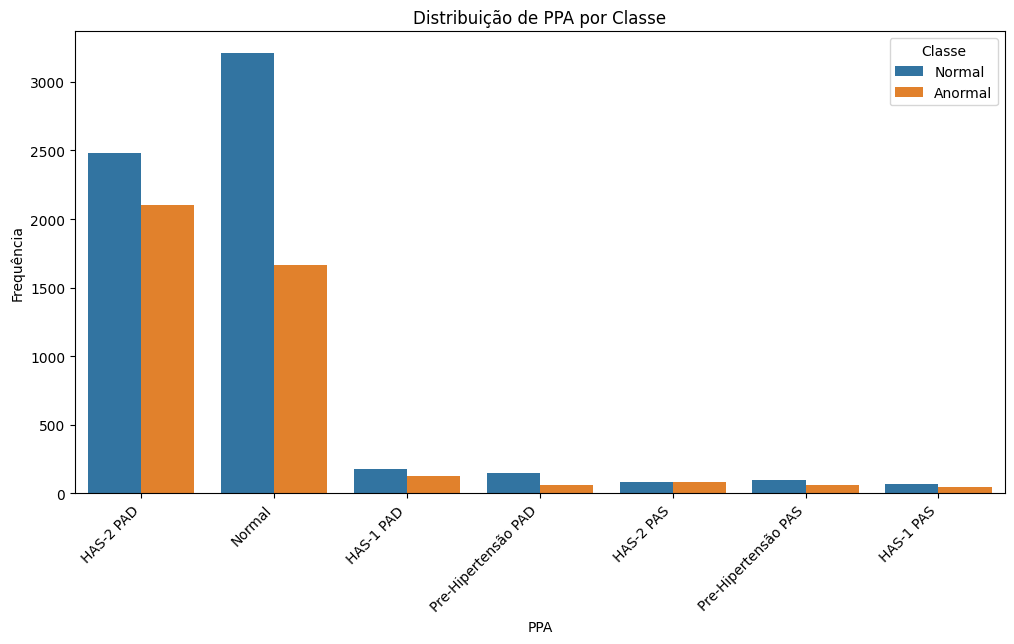

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="PPA",
    hue="CLASSE",
    order=dados_treino["PPA"].value_counts().index,
)
plt.xlabel("PPA")
plt.ylabel("Frequência")
plt.title("Distribuição de PPA por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

Indo para a próxima coluna iremos tratar os valores de 'PULSOS'

Primeiro, iremos plotar o gráfico para ter uma noção da distribuição

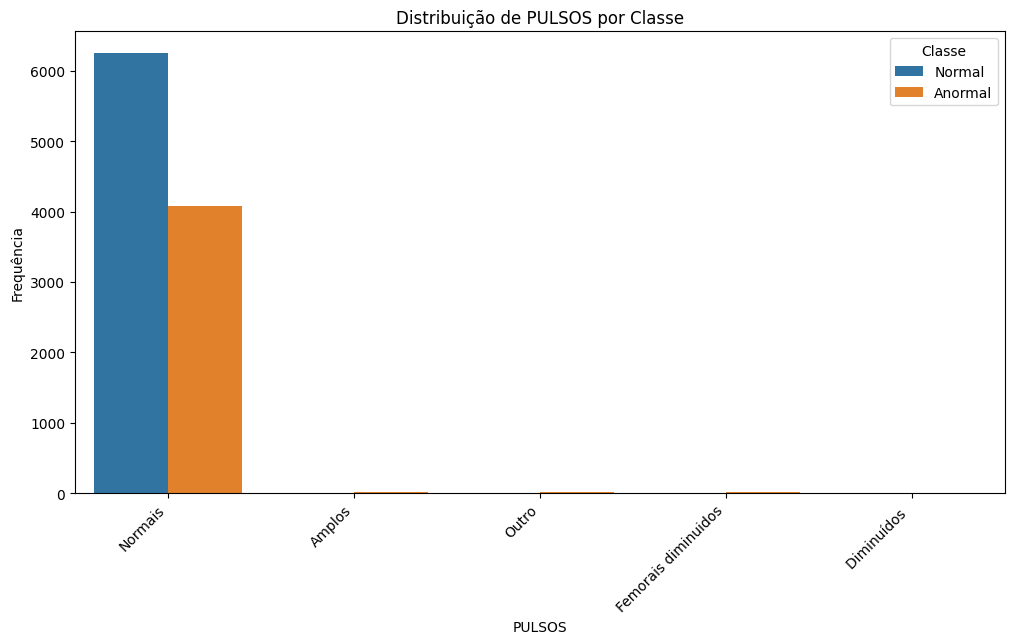

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="PULSOS",
    hue="CLASSE",
    order=dados_treino["PULSOS"].value_counts().index,
)
plt.xlabel("PULSOS")
plt.ylabel("Frequência")
plt.title("Distribuição de PULSOS por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

Levando em conta que a grande maioria dos pulsos são normais, de maneira que não há comparação com as demais, iremos substituir os NaN por normais.

In [46]:
dados_treino['PULSOS'] = dados_treino['PULSOS'].fillna('Normais')

Printando os tipos diferente de pulso para confirmar a alteração

In [47]:
print(dados_treino['PULSOS'].unique())

['Normais' 'Femorais diminuidos' 'Outro' 'Amplos' 'Diminuídos ']


O mesmo processo se repetirá para 'B2'

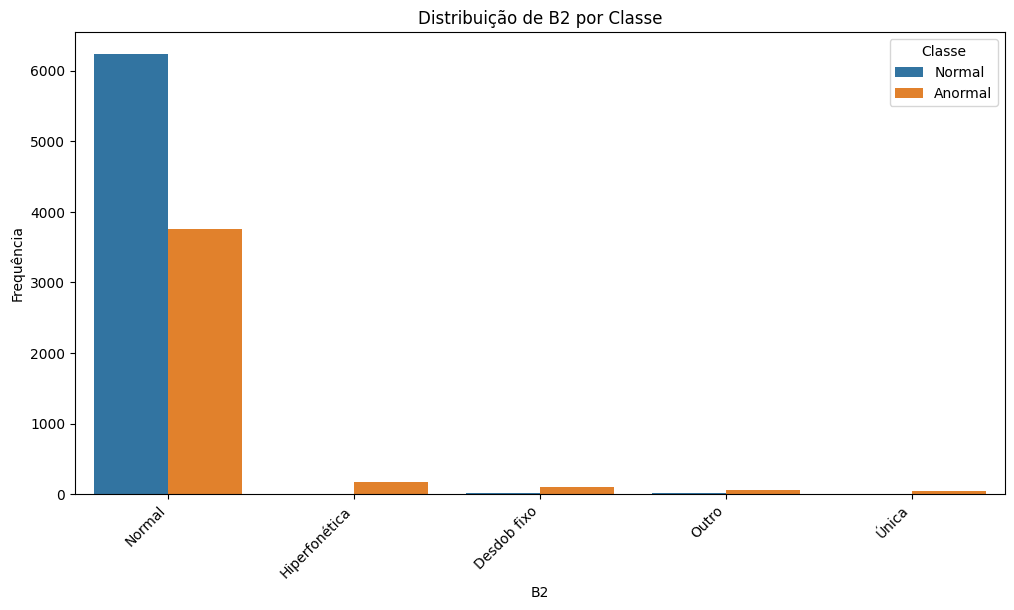

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="B2",
    hue="CLASSE",
    order=dados_treino["B2"].value_counts().index,
)
plt.xlabel("B2")
plt.ylabel("Frequência")
plt.title("Distribuição de B2 por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

Novamente, sua grande maioria é normal, então será substituido por normal

In [49]:
dados_treino["B2"] = dados_treino["B2"].fillna("Normal")

In [50]:
print(dados_treino["PULSOS"].unique())

['Normais' 'Femorais diminuidos' 'Outro' 'Amplos' 'Diminuídos ']


Agora iremos tratar a coluna 'SOPRO'

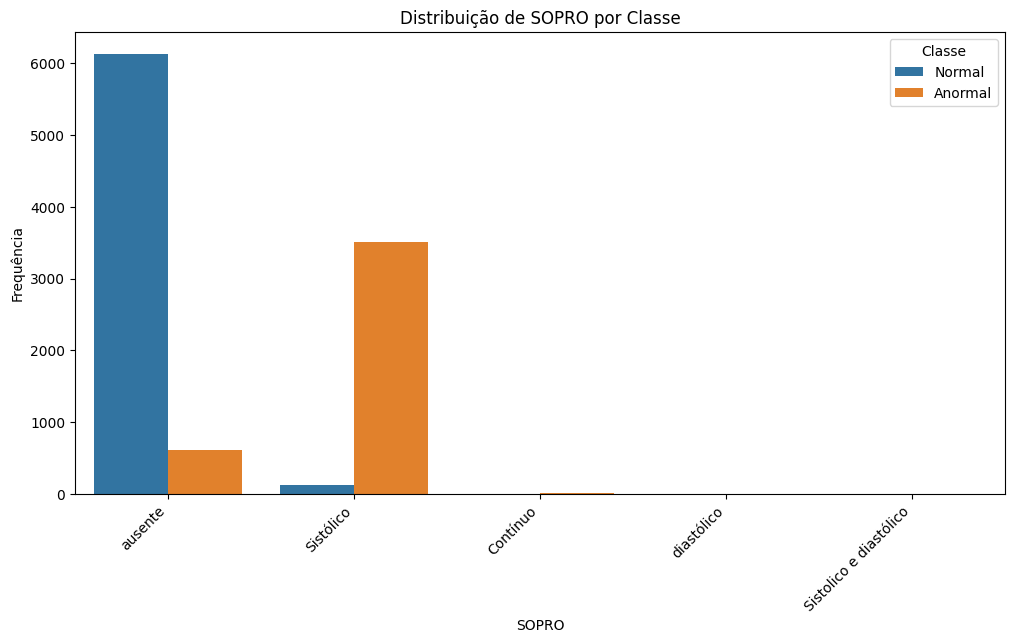

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="SOPRO",
    hue="CLASSE",
    order=dados_treino["SOPRO"].value_counts().index,
)
plt.xlabel("SOPRO")
plt.ylabel("Frequência")
plt.title("Distribuição de SOPRO por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

Como há dois valores dominantes (ausente e sistólico), iremos calcular a proporção de cada um e substituir os valores NaN seguindo essa proporção

In [52]:
qtd_ausente = len(dados_treino[dados_treino['SOPRO'] == 'ausente'])
qtd_sistolico = len(dados_treino) - qtd_ausente

prop_ausente = qtd_ausente / (qtd_ausente + qtd_sistolico)


Calculadas as proporções, agora iremos atribuir aos valores NaN as seguindo.

In [53]:
valores_faltantes = dados_treino['SOPRO'].isna().sum()

qtd_ausente = int(valores_faltantes * prop_ausente)
qtd_sistolico = valores_faltantes - qtd_ausente


In [54]:
dados_treino.loc[dados_treino['SOPRO'].isna(), 'SOPRO'] = 'ausente' * qtd_ausente + 'Sistólico' * qtd_sistolico

Conferindo se os valores ausentes foram removidos

In [55]:
print(dados_treino['SOPRO'].isna().sum())

0


Agora trataremos a coluna FC, mas primeiro, é preciso converte-los primeiro

In [56]:
dados_treino["FC"] = pd.to_numeric(dados_treino["FC"], errors="coerce")

Depois de se converter, os valores são análisados

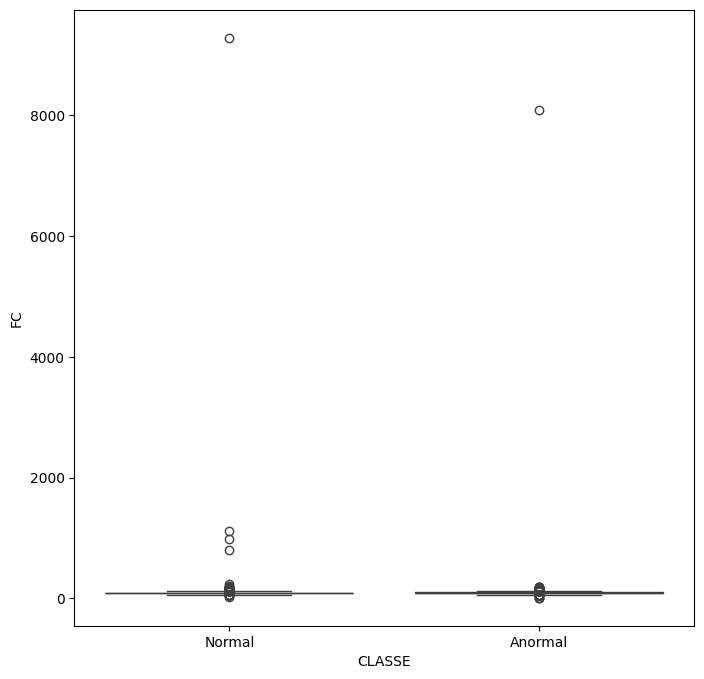

In [57]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="CLASSE", y="FC", data=dados_treino, whis=1.5)
plt.show()

Pós plotagem do boxplot, fica evidente a necessidade de lidar com outliners

In [58]:
fc_acima =dados_treino[dados_treino['FC'] > 250]
fc_abaixo =dados_treino[dados_treino['FC'] < 20]

print(len(fc_abaixo), len(fc_acima))

4 5


Plotando o boxplot novamente para verificar se os outliners foram removidos

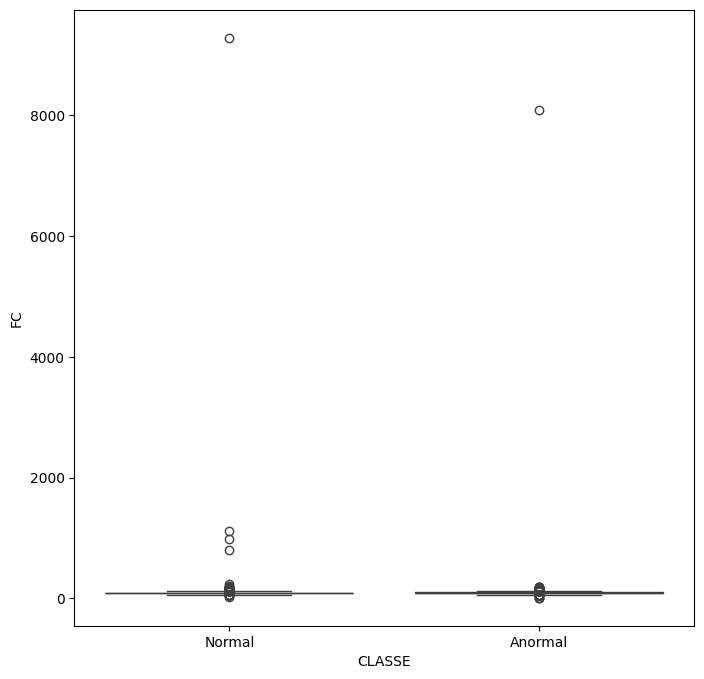

In [59]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="CLASSE", y="FC", data=dados_treino, whis=1.5)
plt.show()

Agora iremos tratar os valores faltantes

In [60]:
print(dados_treino['FC'].describe())

count    9924.000000
mean       93.871826
std       124.454147
min        10.000000
25%        80.000000
50%        90.000000
75%       100.000000
max      9288.000000
Name: FC, dtype: float64


Como o std é relativamente baixo para as amostras, os NaN serão substítuidos pela média

In [61]:
dados_treino['FC'] = dados_treino['FC'].fillna(value=dados_treino['FC'].mean())

Conferindo se os NaN foram removidos

In [62]:
print(dados_treino['FC'].isna().sum())

0


In [63]:
dados_treino['FC'] = dados_treino['FC'].drop(fc_acima.index)
dados_treino['FC'] = dados_treino['FC'].drop(fc_abaixo.index)

Partindo para o HDA 1, analisaremos possíveis inconsistencias e valores NaN

In [64]:
print(dados_treino['HDA 1'].isna().sum())

2741


Como há muitos valores NaN, remover todas essas amostras será muito prejudicial, por isso iremos plotar e analisar os gráficos para decidir o que fazer.

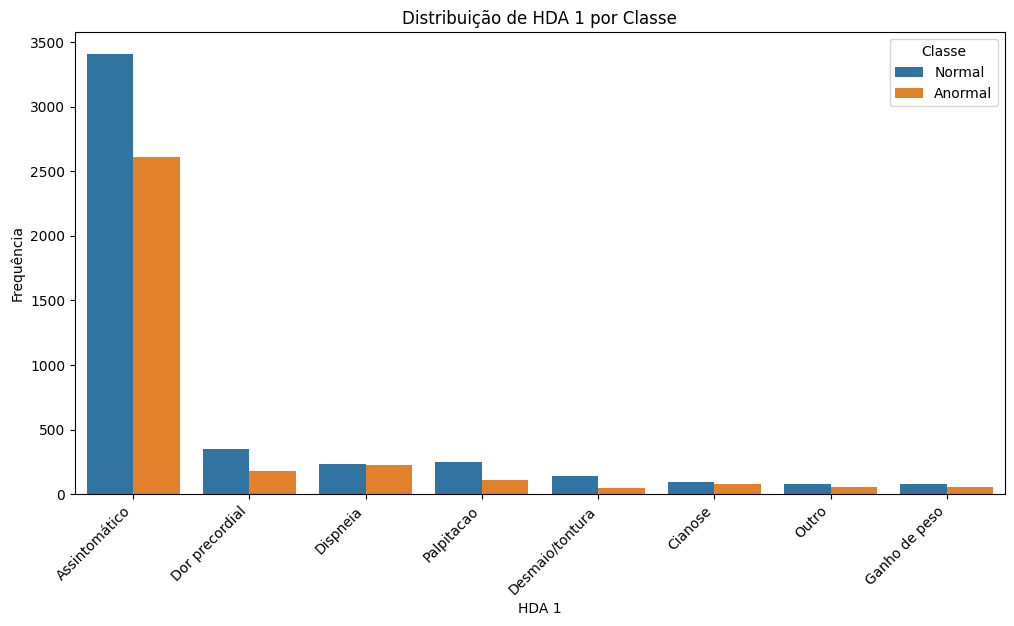

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="HDA 1",
    hue="CLASSE",
    order=dados_treino["HDA 1"].value_counts().index,
)
plt.xlabel("HDA 1")
plt.ylabel("Frequência")
plt.title("Distribuição de HDA 1 por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

Faremos uma distribuição baseada em proproção, assim como foram as anteriores.

In [66]:
qtd_assintomatico = len(dados_treino[dados_treino['HDA 1'] == 'Assintomático'])
qtd_dor_precordial = len(dados_treino[dados_treino['HDA 1'] == 'Dor precordial'])
qtd_dispneia = len(dados_treino[dados_treino['HDA 1'] == 'Dispneia'])
qtd_palpitacao = len(dados_treino[dados_treino['HDA 1'] == 'Palpitacao'])
qtd_desmaio = len(dados_treino[dados_treino['HDA 1'] == 'Desmaio/tontura'])
qtd_cianose = len(dados_treino[dados_treino['HDA 1'] == 'Cianose'])
qtd_outro = len(dados_treino[dados_treino['HDA 1'] == 'Outro'])
qtd_peso = len(dados_treino[dados_treino['HDA 1'] == 'Ganho de peso'])

6031
532


In [67]:
valores_faltantes = dados_treino["HDA 1"].isna().sum()
total_presentes = (
    qtd_assintomatico
    + qtd_dor_precordial
    + qtd_dispneia
    + qtd_palpitacao
    + qtd_desmaio
    + qtd_cianose
    + qtd_outro
    + qtd_peso
)

prop_assintomatico = qtd_assintomatico / total_presentes
prop_dor_precordial = qtd_dor_precordial / total_presentes
prop_dispneia = qtd_dispneia / total_presentes
prop_palpitacao = qtd_palpitacao / total_presentes
prop_desmaio = qtd_desmaio / total_presentes
prop_cianose = qtd_cianose / total_presentes
prop_outro = qtd_outro / total_presentes
prop_peso = qtd_peso / total_presentes

In [68]:
qtd_assintomatico_faltantes = int(valores_faltantes * prop_assintomatico)
qtd_dor_precordial_faltantes = int(valores_faltantes * prop_dor_precordial)
qtd_dispneia_faltantes = int(valores_faltantes * prop_dispneia)
qtd_palpitacao_faltantes = int(valores_faltantes * prop_palpitacao)
qtd_desmaio_faltantes = int(valores_faltantes * prop_desmaio)
qtd_cianose_faltantes = int(valores_faltantes * prop_cianose)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_peso_faltantes = valores_faltantes - (
    qtd_assintomatico_faltantes
    + qtd_dor_precordial_faltantes
    + qtd_dispneia_faltantes
    + qtd_palpitacao_faltantes
    + qtd_desmaio_faltantes
    + qtd_cianose_faltantes
    + qtd_outro_faltantes
)


valores_faltantes_lista = (
    ["Assintomático"] * qtd_assintomatico_faltantes
    + ["Dor precordial"] * qtd_dor_precordial_faltantes
    + ["Dispneia"] * qtd_dispneia_faltantes
    + ["Palpitacao"] * qtd_palpitacao_faltantes
    + ["Desmaio/tontura"] * qtd_desmaio_faltantes
    + ["Cianose"] * qtd_cianose_faltantes
    + ["Outro"] * qtd_outro_faltantes
    + ["Ganho de peso"] * qtd_peso_faltantes
)


import random

# Embaralhando os valores para evitar viés de posição
random.shuffle(valores_faltantes_lista)


dados_treino.loc[dados_treino["HDA 1"].isna(), "HDA 1"] = valores_faltantes_lista


HDA 1
Assintomático      8094
Dor precordial      714
Dispneia            618
Palpitacao          485
Desmaio/tontura     253
Cianose             233
Outro               179
Ganho de peso       176
Name: count, dtype: int64


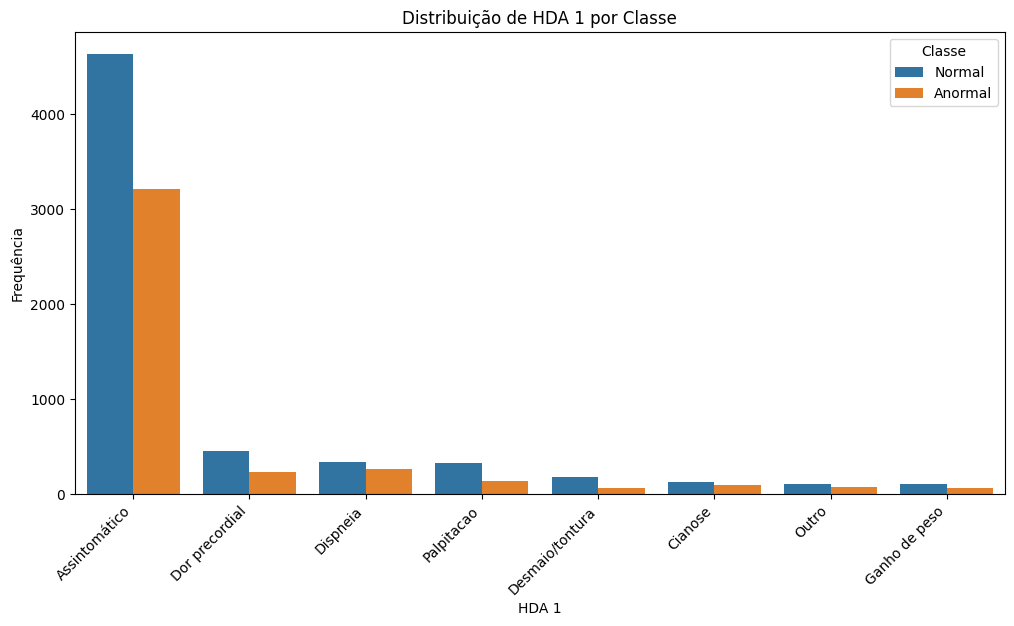

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="HDA 1",
    hue="CLASSE",
    order=dados_treino["HDA 1"].value_counts().index,
)
plt.xlabel("HDA 1")
plt.ylabel("Frequência")
plt.title("Distribuição de HDA 1 por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

Partindo para HDA2, seguindo o mesmo procedimento, analisando os dados e depois tomando uma ação

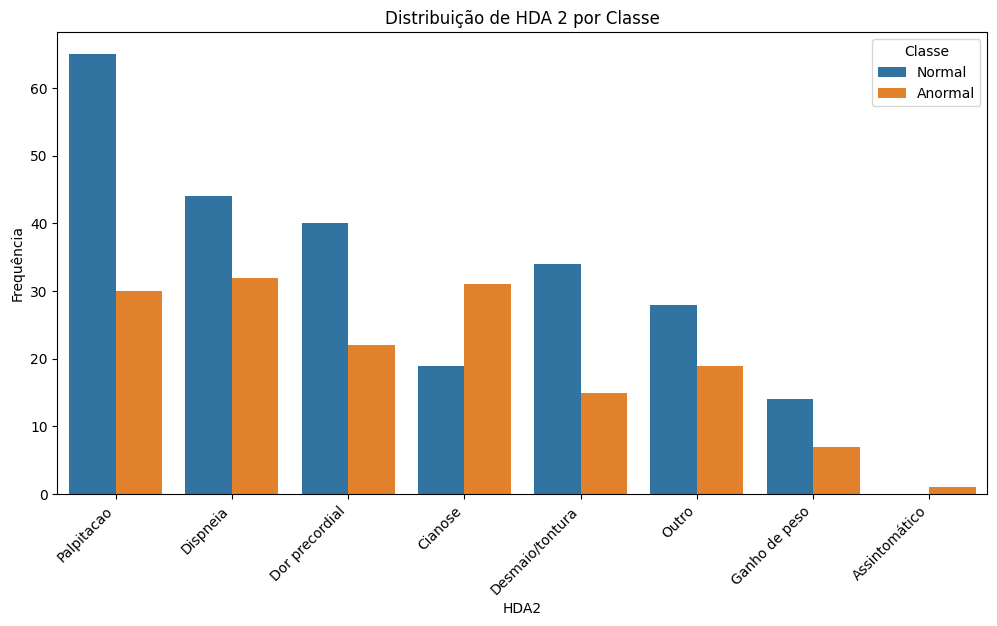

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="HDA2",
    hue="CLASSE",
    order=dados_treino["HDA2"].value_counts().index,
)
plt.xlabel("HDA2")
plt.ylabel("Frequência")
plt.title("Distribuição de HDA 2 por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

Será feito a mesma abordagem que HDA1

In [74]:
qtd_assintomatico = len(dados_treino[dados_treino["HDA2"] == "Assintomático"])
qtd_dor_precordial = len(dados_treino[dados_treino["HDA2"] == "Dor precordial"])
qtd_dispneia = len(dados_treino[dados_treino["HDA2"] == "Dispneia"])
qtd_palpitacao = len(dados_treino[dados_treino["HDA2"] == "Palpitacao"])
qtd_desmaio = len(dados_treino[dados_treino["HDA2"] == "Desmaio/tontura"])
qtd_cianose = len(dados_treino[dados_treino["HDA2"] == "Cianose"])
qtd_outro = len(dados_treino[dados_treino["HDA2"] == "Outro"])
qtd_peso = len(dados_treino[dados_treino["HDA2"] == "Ganho de peso"])

10349


In [76]:
valores_faltantes = dados_treino["HDA2"].isna().sum()
total_presentes = (
    qtd_assintomatico
    + qtd_dor_precordial
    + qtd_dispneia
    + qtd_palpitacao
    + qtd_desmaio
    + qtd_cianose
    + qtd_outro
    + qtd_peso
)

prop_assintomatico = qtd_assintomatico / total_presentes
prop_dor_precordial = qtd_dor_precordial / total_presentes
prop_dispneia = qtd_dispneia / total_presentes
prop_palpitacao = qtd_palpitacao / total_presentes
prop_desmaio = qtd_desmaio / total_presentes
prop_cianose = qtd_cianose / total_presentes
prop_outro = qtd_outro / total_presentes
prop_peso = qtd_peso / total_presentes

In [77]:
qtd_assintomatico_faltantes = int(valores_faltantes * prop_assintomatico)
qtd_dor_precordial_faltantes = int(valores_faltantes * prop_dor_precordial)
qtd_dispneia_faltantes = int(valores_faltantes * prop_dispneia)
qtd_palpitacao_faltantes = int(valores_faltantes * prop_palpitacao)
qtd_desmaio_faltantes = int(valores_faltantes * prop_desmaio)
qtd_cianose_faltantes = int(valores_faltantes * prop_cianose)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_peso_faltantes = valores_faltantes - (
    qtd_assintomatico_faltantes
    + qtd_dor_precordial_faltantes
    + qtd_dispneia_faltantes
    + qtd_palpitacao_faltantes
    + qtd_desmaio_faltantes
    + qtd_cianose_faltantes
    + qtd_outro_faltantes
)


valores_faltantes_lista = (
    ["Assintomático"] * qtd_assintomatico_faltantes
    + ["Dor precordial"] * qtd_dor_precordial_faltantes
    + ["Dispneia"] * qtd_dispneia_faltantes
    + ["Palpitacao"] * qtd_palpitacao_faltantes
    + ["Desmaio/tontura"] * qtd_desmaio_faltantes
    + ["Cianose"] * qtd_cianose_faltantes
    + ["Outro"] * qtd_outro_faltantes
    + ["Ganho de peso"] * qtd_peso_faltantes
)


import random

# Embaralhando os valores para evitar viés de posição
random.shuffle(valores_faltantes_lista)


dados_treino.loc[dados_treino["HDA2"].isna(), "HDA2"] = valores_faltantes_lista

In [78]:
print(dados_treino['HDA2'].isna().sum())

0


Agora iremos tratar os motivos

In [79]:
print(dados_treino['MOTIVO1'].isna().sum())

109


PLotando o gráfico

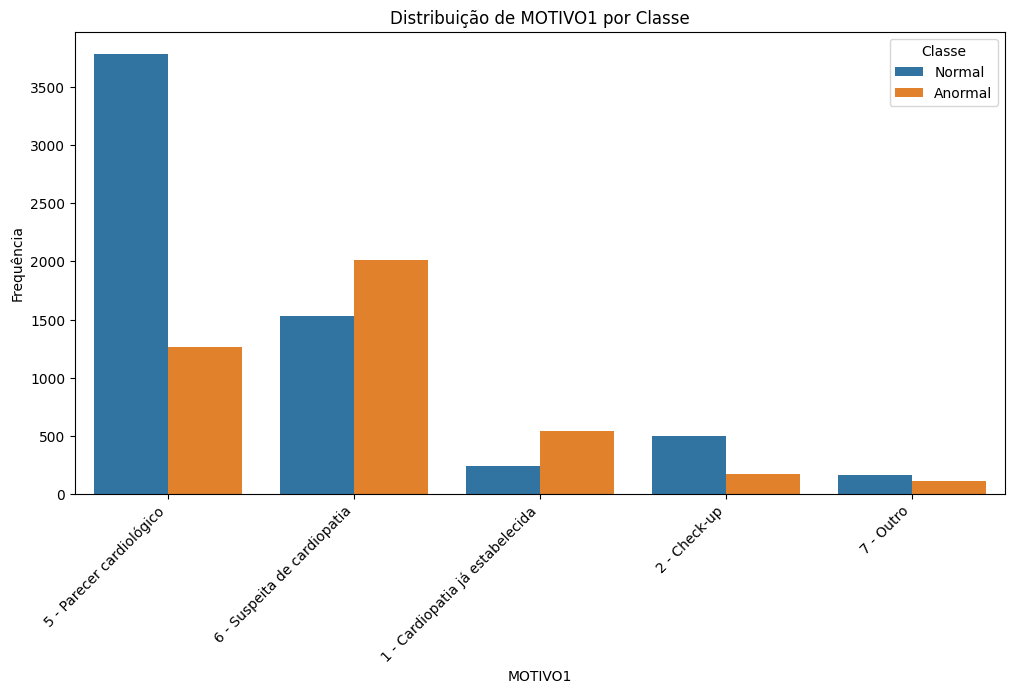

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="MOTIVO1",
    hue="CLASSE",
    order=dados_treino["MOTIVO1"].value_counts().index,
)
plt.xlabel("MOTIVO1")
plt.ylabel("Frequência")
plt.title("Distribuição de MOTIVO1 por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

O mesmo processo de porporção será repetido

In [86]:
qtd_suspeita = len(
    dados_treino[dados_treino["MOTIVO1"] == "6 - Suspeita de cardiopatia"]
)
qtd_parecer = len(dados_treino[dados_treino["MOTIVO1"] == "5 - Parecer cardiológico"])
qtd_outro = len(dados_treino[dados_treino["MOTIVO1"] == "7 - Outro"])
qtd_checkup = len(dados_treino[dados_treino["MOTIVO1"] == "2 - Check-up"])
qtd_cardiopatia = len(
    dados_treino[dados_treino["MOTIVO1"] == "1 - Cardiopatia já estabelecida"]
)

In [88]:
valores_faltantes = dados_treino["MOTIVO1"].isna().sum()
total_presentes = qtd_suspeita + qtd_parecer + qtd_outro + qtd_checkup + qtd_cardiopatia

prop_suspeita = qtd_suspeita / total_presentes
prop_parecer = qtd_parecer / total_presentes
prop_outro = qtd_outro / total_presentes
prop_checkup = qtd_checkup / total_presentes
prop_cardiopatia = qtd_cardiopatia / total_presentes

In [90]:
qtd_suspeita_faltantes = int(valores_faltantes * prop_suspeita)
qtd_parecer_faltantes = int(valores_faltantes * prop_parecer)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_checkup_faltantes = int(valores_faltantes * prop_checkup)
qtd_cardiopatia_faltantes = valores_faltantes - (
    qtd_suspeita_faltantes
    + qtd_parecer_faltantes
    + qtd_outro_faltantes
    + qtd_checkup_faltantes
)


valores_faltantes_lista = (
    ["6 - Suspeita de cardiopatia"] * qtd_suspeita_faltantes
    + ["5 - Parecer cardiológico"] * qtd_parecer_faltantes
    + ["7 - Outro"] * qtd_outro_faltantes
    + ["2 - Check-up"] * qtd_checkup_faltantes
    + ["1 - Cardiopatia já estabelecida"] * qtd_cardiopatia_faltantes
)

# Embaralhando os valores para evitar viés de posição
import random

random.shuffle(valores_faltantes_lista)

dados_treino.loc[dados_treino["MOTIVO1"].isna(), "MOTIVO1"] = valores_faltantes_lista

ValueError: Must have equal len keys and value when setting with an iterable

In [93]:
print(dados_treino['MOTIVO1'].unique())

['6 - Suspeita de cardiopatia' '5 - Parecer cardiológico' '7 - Outro'
 '2 - Check-up' '1 - Cardiopatia já estabelecida']


Partindo para MOTIVO2, será repetido o mesmo processo, porém selecionando menos atributos

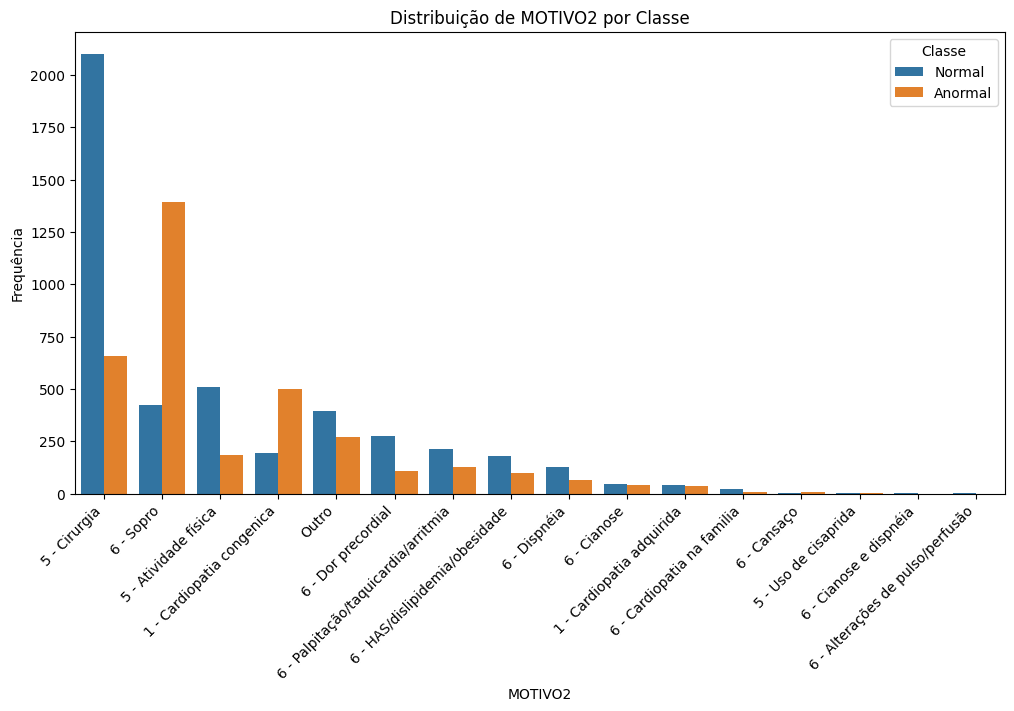

In [92]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=dados_treino,
    x="MOTIVO2",
    hue="CLASSE",
    order=dados_treino["MOTIVO2"].value_counts().index,
)
plt.xlabel("MOTIVO2")
plt.ylabel("Frequência")
plt.title("Distribuição de MOTIVO2 por Classe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Classe")
plt.show()

In [94]:
print(dados_treino['MOTIVO2'].unique())

['6 - Palpitação/taquicardia/arritmia' '6 - Sopro' nan '5 - Cirurgia'
 'Outro' '6 - HAS/dislipidemia/obesidade' '5 - Atividade física'
 '6 - Cardiopatia na familia' '1 - Cardiopatia congenica'
 '6 - Dor precordial' '6 - Dispnéia' '1 - Cardiopatia adquirida'
 '6 - Cianose' '6 - Cansaço' '5 - Uso de cisaprida'
 '6 - Alterações de pulso/perfusão' '6 - Cianose e dispnéia']


Novamente, o mesmo processo

In [95]:
qtd_palp_taquicardia = len(
    dados_treino[dados_treino["MOTIVO2"] == "6 - Palpitação/taquicardia/arritmia"]
)
qtd_sopro = len(dados_treino[dados_treino["MOTIVO2"] == "6 - Sopro"])
qtd_cirurgia = len(dados_treino[dados_treino["MOTIVO2"] == "5 - Cirurgia"])
qtd_outro = len(dados_treino[dados_treino["MOTIVO2"] == "Outro"])
qtd_has_obesidade = len(
    dados_treino[dados_treino["MOTIVO2"] == "6 - HAS/dislipidemia/obesidade"]
)
qtd_atividade_fisica = len(
    dados_treino[dados_treino["MOTIVO2"] == "5 - Atividade física"]
)
qtd_cardiopatia_congenica = len(
    dados_treino[dados_treino["MOTIVO2"] == "1 - Cardiopatia congenica"]
)
qtd_dor_preco = len(dados_treino[dados_treino["MOTIVO2"] == "6 - Dor precordial"])
qtd_dispneia = len(dados_treino[dados_treino["MOTIVO2"] == "6 - Dispnéia"])

In [96]:
valores_faltantes = dados_treino["MOTIVO2"].isna().sum()
total_presentes = (
    qtd_palp_taquicardia
    + qtd_sopro
    + qtd_cirurgia
    + qtd_outro
    + qtd_has_obesidade
    + qtd_atividade_fisica
    + qtd_cardiopatia_congenica
    + qtd_dor_preco
    + qtd_dispneia
)


prop_palp_taquicardia = qtd_palp_taquicardia / total_presentes
prop_sopro = qtd_sopro / total_presentes
prop_cirurgia = qtd_cirurgia / total_presentes
prop_outro = qtd_outro / total_presentes
prop_has_obesidade = qtd_has_obesidade / total_presentes
prop_atividade_fisica = qtd_atividade_fisica / total_presentes
prop_cardiopatia_congenica = qtd_cardiopatia_congenica / total_presentes
prop_dor_preco = qtd_dor_preco / total_presentes
prop_dispneia = qtd_dispneia / total_presentes

In [97]:
qtd_palp_taquicardia_faltantes = int(valores_faltantes * prop_palp_taquicardia)
qtd_sopro_faltantes = int(valores_faltantes * prop_sopro)
qtd_cirurgia_faltantes = int(valores_faltantes * prop_cirurgia)
qtd_outro_faltantes = int(valores_faltantes * prop_outro)
qtd_has_obesidade_faltantes = int(valores_faltantes * prop_has_obesidade)
qtd_atividade_fisica_faltantes = int(valores_faltantes * prop_atividade_fisica)
qtd_cardiopatia_congenica_faltantes = int(
    valores_faltantes * prop_cardiopatia_congenica
)
qtd_dor_preco_faltantes = int(valores_faltantes * prop_dor_preco)
qtd_dispneia_faltantes = valores_faltantes - (
    qtd_palp_taquicardia_faltantes
    + qtd_sopro_faltantes
    + qtd_cirurgia_faltantes
    + qtd_outro_faltantes
    + qtd_has_obesidade_faltantes
    + qtd_atividade_fisica_faltantes
    + qtd_cardiopatia_congenica_faltantes
    + qtd_dor_preco_faltantes
)


valores_faltantes_lista = (
    ["6 - Palpitação/taquicardia/arritmia"] * qtd_palp_taquicardia_faltantes
    + ["6 - Sopro"] * qtd_sopro_faltantes
    + ["5 - Cirurgia"] * qtd_cirurgia_faltantes
    + ["Outro"] * qtd_outro_faltantes
    + ["6 - HAS/dislipidemia/obesidade"] * qtd_has_obesidade_faltantes
    + ["5 - Atividade física"] * qtd_atividade_fisica_faltantes
    + ["1 - Cardiopatia congenica"] * qtd_cardiopatia_congenica_faltantes
    + ["6 - Dor precordial"] * qtd_dor_preco_faltantes
    + ["6 - Dispnéia"] * qtd_dispneia_faltantes
)

# Embaralhando os valores para evitar viés de posição
import random

random.shuffle(valores_faltantes_lista)

# Preenchendo os valores ausentes na coluna 'MOTIVO2'
dados_treino.loc[dados_treino["MOTIVO2"].isna(), "MOTIVO2"] = valores_faltantes_lista

In [98]:
print(dados_treino['MOTIVO2'].isna().sum())

0


Por último, precisamos tratar os valores irregulares de idade, que são diversos, como não se pode basear a idade nos demais atributos, será usado um modelo de regressão linear, utilizando os dados coerentes como dados de treinamento.

Porém, primeiro precisamos remover colunas que não serão utilizadas e tratar dados não numéricos

##### Com todos os valores faltantes e espúrios tratados, agora iremos remover atributos que não nos serão úteis

Entre esses atributos estão: Atendimento, DN, Convênio. Logo iremos removê-las

In [70]:
dados_treino.drop(columns=['Atendimento', 'DN', 'Convenio'], inplace=True)

In [71]:
display(dados_treino)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,Normais,110.00000,80.000000,HAS-1 PAD,Normal,ausente,100.0,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
2,4483,13.0,87,17.175320,2.21,Normais,101.33085,62.404595,HAS-2 PAD,Normal,Sistólico,100.0,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
4,11652,42.4,136,22.923875,0.06,Normais,100.00000,60.000000,HAS-2 PAD,Normal,ausente,78.0,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
5,15430,45.0,161,17.360441,7.60,Normais,120.00000,70.000000,HAS-1 PAS,Normal,ausente,80.0,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
6,1023,18.5,105,16.780045,3.93,Normais,90.00000,60.000000,Normal,Normal,ausente,92.0,Assintomático,NaN,F,7 - Outro,Outro,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14719,9673,16.7,100,16.700000,3.49,Normais,90.00000,60.000000,Normal,Normal,ausente,120.0,Assintomático,NaN,F,6 - Suspeita de cardiopatia,6 - Dor precordial,Normal
14721,3023,25.0,126,15.747040,8.80,Normais,100.00000,60.000000,Normal,Normal,ausente,76.0,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
14723,3249,30.0,113,23.494401,4.97,Normais,105.00000,70.000000,Pre-Hipertensão PAD,Normal,Sistólico,92.0,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal
14724,3207,25.8,130,15.266272,7.69,Normais,90.00000,55.000000,Normal,Normal,ausente,78.0,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Normal


Depois da remoção, iremos mapear os atributos não numéricos em numéricos

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
pulsos = dados_treino['PULSOS']
ppa = dados_treino['PPA']
b2 = dados_treino['B2']
sopro = dados_treino['SOPRO']
hda1 = dados_treino['HDA 1']
hda2 = dados_treino['HDA2']
sexo = dados_treino['SEXO']
motivo1 = dados_treino['MOTIVO1']
motivo2 = dados_treino['MOTIVO2']
classe = dados_treino['CLASSE']

In [103]:
lencoder = LabelEncoder()

Atribuindo valores distintos para cada valor não numérico

In [104]:
pulsos_num = lencoder.fit_transform(dados_treino["PULSOS"])
ppa_num = lencoder.fit_transform(dados_treino["PPA"])
b2_num = lencoder.fit_transform(dados_treino["B2"])
sopro_num = lencoder.fit_transform(dados_treino["SOPRO"])
hda1_num = lencoder.fit_transform(dados_treino["HDA 1"])
hda2_num = lencoder.fit_transform(dados_treino["HDA2"])
sexo_num = lencoder.fit_transform(dados_treino["SEXO"])
motivo1_num = lencoder.fit_transform(dados_treino["MOTIVO1"])
motivo2_num = lencoder.fit_transform(dados_treino["MOTIVO2"])
classe_num = lencoder.fit_transform(dados_treino["CLASSE"])

In [105]:
dados_treino["PULSOS"] = pulsos_num
dados_treino["PPA"] = ppa_num
dados_treino["B2"] = b2_num
dados_treino["SOPRO"] = sopro_num
dados_treino["HDA 1"] = hda1_num
dados_treino["HDA2"] = hda2_num
dados_treino["SEXO"] = sexo_num
dados_treino["MOTIVO1"] = motivo1_num
dados_treino["MOTIVO2"] = motivo2_num
dados_treino["CLASSE"] = classe_num

Mostrando o novo df

In [106]:
display(dados_treino)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,3,110.00000,80.000000,0,2,3,100.0,7,7,1,3,13,1
2,4483,13.0,87,17.175320,2.21,3,101.33085,62.404595,2,2,2,100.0,0,0,1,3,14,0
4,11652,42.4,136,22.923875,0.06,3,100.00000,60.000000,2,2,3,78.0,0,0,0,2,3,1
5,15430,45.0,161,17.360441,7.60,3,120.00000,70.000000,1,2,3,80.0,0,0,1,2,3,1
6,1023,18.5,105,16.780045,3.93,3,90.00000,60.000000,4,2,3,92.0,0,0,0,4,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14719,9673,16.7,100,16.700000,3.49,3,90.00000,60.000000,4,2,3,120.0,0,0,0,3,11,1
14721,3023,25.0,126,15.747040,8.80,3,100.00000,60.000000,4,2,3,76.0,0,0,0,2,3,1
14723,3249,30.0,113,23.494401,4.97,3,105.00000,70.000000,5,2,2,92.0,3,7,0,3,10,0
14724,3207,25.8,130,15.266272,7.69,3,90.00000,55.000000,4,2,3,78.0,0,0,1,3,14,1


Plotando uma matriz de correlação pra ver quais atributos se relacionam com idade

In [109]:
correlacao = dados_treino.corr()

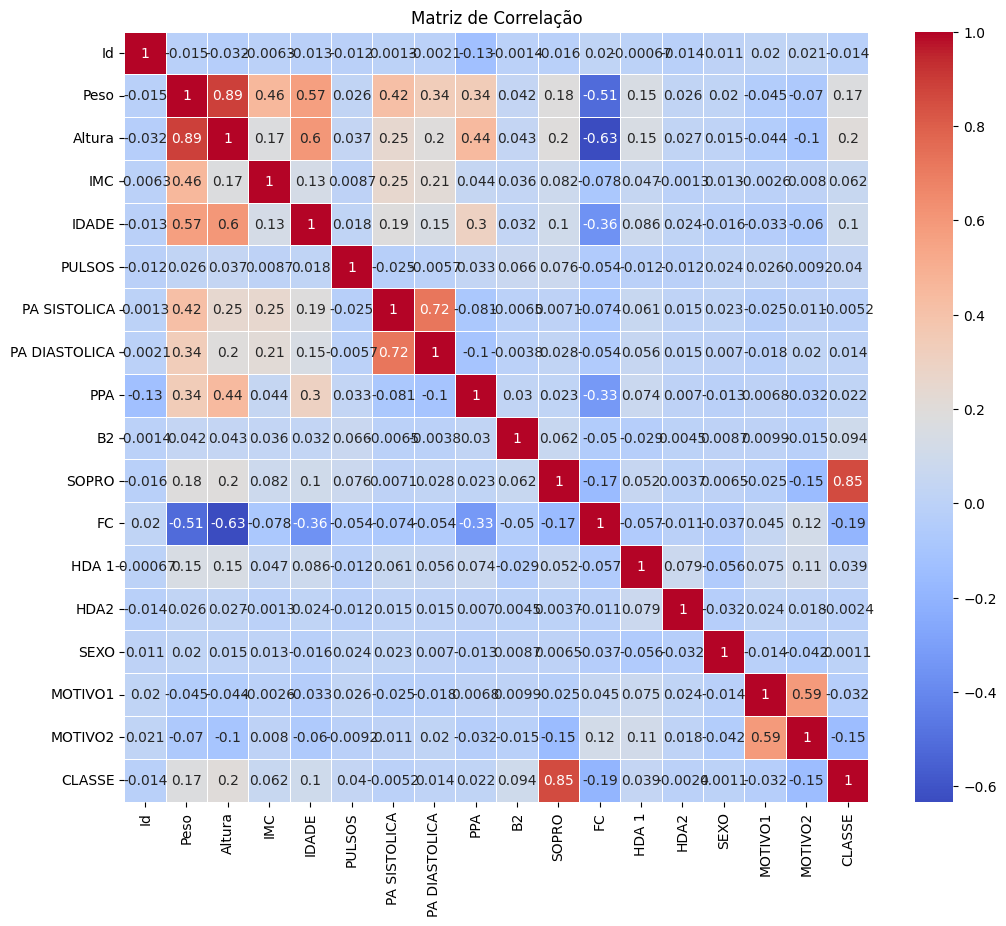

In [110]:
plt.figure(figsize=(12, 10))
# Cria um mapa de calor para a matriz de correlação, definindo o esquema de cores
sns.heatmap(correlacao, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

De acordo com o gráfico, peso e altura tem maior relação com idade, assim eles serão usados no treinamento do modelo.

Separando os dados

Importando train_test_split, para dividir o conjunto de treinamento

Dividindo o cnjunto de treinamento

Importando e treinando o modelo

Com o modelo treinado, iremos calcular a idade dos valores inválidos 

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [ ]:
idades_treinamento = (dados_treino["IDADE"] < 0.5) & (dados_treino["IDADE"] > 19)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.